In [8]:
import sigpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline
import phantom_mod as ph

In [19]:
def phantom(size):
    return ph.phantom(n=size)

In [20]:
phantom_img = phantom(128)
print(phantom_img.shape)

(128, 128)


In [30]:
def myXrayIntegration(interp, t, theta, ds):

    sum = 0
    for s in np.arange(-128, 128, ds):
        x = t * np.cos(theta) - s * np.sin(theta)  # Rotated x-coordinates
        y = t * np.sin(theta) + s * np.cos(theta)
        sum += interp(x+64, y+64) * ds
    return sum


In [31]:
def myXrayCTRadonTransform(phantom_img, d_theta = 5, dt=5, ds = 1):

    x_range, y_range = phantom_img.shape

    x = np.linspace(0, x_range, x_range, endpoint=False)
    y = np.linspace(0, y_range, y_range, endpoint=False)

    interp = RectBivariateSpline(x, y, phantom_img)

    max_radius = 90
    d_theta = np.deg2rad(d_theta)

    angles = np.arange(0, np.pi, d_theta)
    dist = np.arange(-max_radius, max_radius, dt)

    radon_transform = np.zeros((len(dist), len(angles)))

    for i, theta in enumerate(angles):
        for j, t in enumerate(dist):
            radon_transform[j, i] = myXrayIntegration(interp, t, theta, ds)

    plt.imshow(radon_transform, cmap='autumn')
    return radon_transform

Radon Transform with ds = 0.5


/tmp/ipykernel_5479/4026663813.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  radon_transform[j, i] = myXrayIntegration(interp, t, theta, ds)


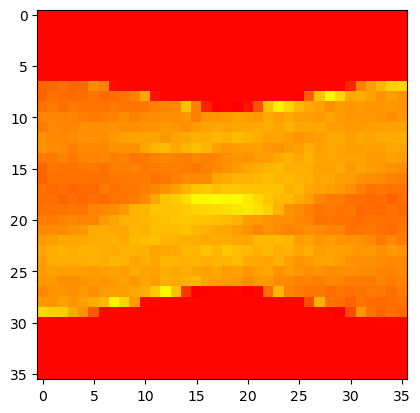

In [43]:
print("Radon Transform with ds = 0.5")
radon_1 = myXrayCTRadonTransform(phantom_img, 5, 5, ds=0.5)

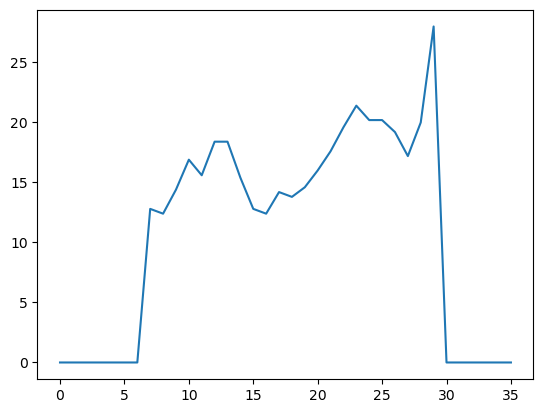

In [44]:
plt.plot(radon_1[:, 0])

Radon Transform with ds = 1


/tmp/ipykernel_5479/4026663813.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  radon_transform[j, i] = myXrayIntegration(interp, t, theta, ds)


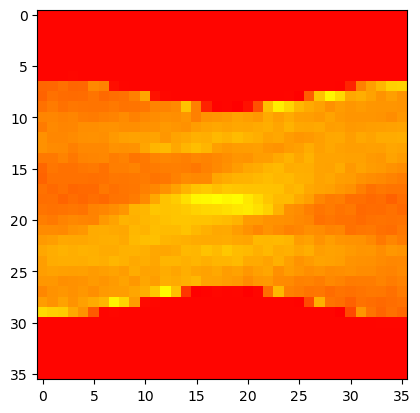

In [45]:
print("Radon Transform with ds = 1")
radon_2 = myXrayCTRadonTransform(phantom_img, 5, 5, ds=1)

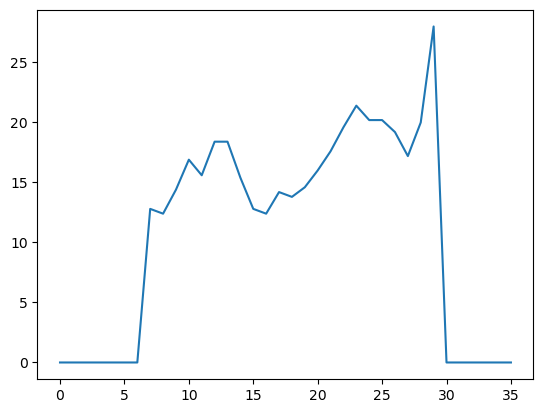

In [46]:
plt.plot(radon_2[:, 0])

Radon Transform with ds = 3


/tmp/ipykernel_5479/4026663813.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  radon_transform[j, i] = myXrayIntegration(interp, t, theta, ds)


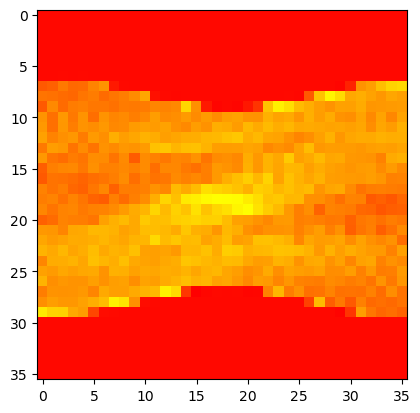

In [47]:
print("Radon Transform with ds = 3")
radon_3 = myXrayCTRadonTransform(phantom_img, 5, 5, ds=3)

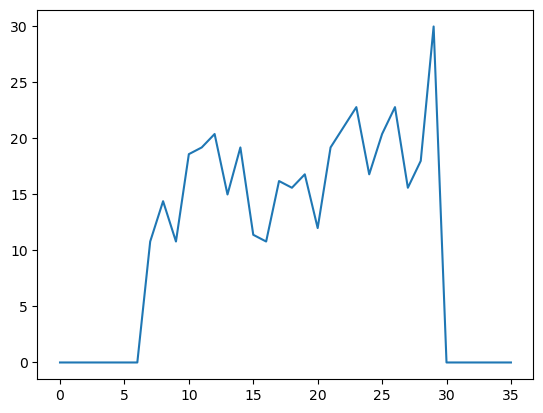

In [48]:
plt.plot(radon_3[:, 0])